## Day 15

https://adventofcode.com/2021/day/15

In [1]:
def readInput15(filename):
    with open(filename) as f:
        return [ [ int(c) for c in l.strip("\n") ] for l in f.readlines() ]

grid0 = readInput15("data/day15test1.txt")
grid = readInput15("data/input15.txt")

### Part 1

I already solved a very similar problem in Project Euler (problem 81, 82 and 83), it requires to find the shortest path on a weigthed graph. I can do it using `networkx` for a quick solution, or use my own implementation of the Dijkstra algorithm.

In [2]:
import networkx as nx

def getDirs(p,m):
    x,y=p
    d = []
    if x-1>=0:
        d.append((x-1,y))
    if x+1<len(m[0]):
        d.append((x+1,y))
    if y+1<len(m):
        d.append((x,y+1))
    if y-1>=0:
        d.append((x,y-1))
    return d

def getDiGraph(matrix):
    G = nx.DiGraph() 
    for y in range(len(matrix)):
        for x in range(len(matrix[0])):
            p = (x,y)
            for pn in getDirs(p,matrix):
                xn,yn = pn
                G.add_edge(p,pn,weight=matrix[yn][xn])
    return G

def getShortestPath(matrix):
    G = getDiGraph(matrix)
    return nx.shortest_path_length(G, source=(0,0), target=(len(matrix)-1,len(matrix[0])-1), weight="weight")

In [3]:
print("Test 1:",getShortestPath(grid0))
print("Part 1:",getShortestPath(grid))

Test 1: 40
Part 1: 745


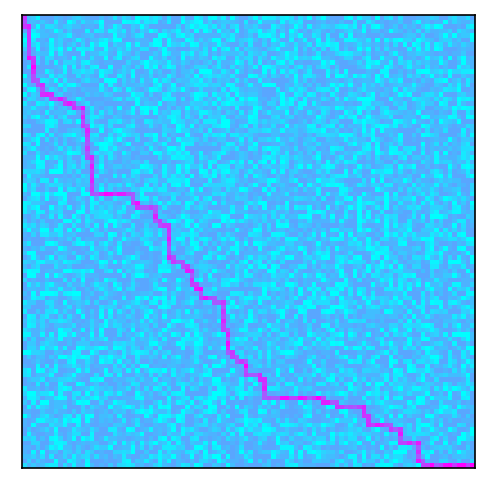

In [4]:
from copy import deepcopy
import matplotlib.pyplot as plt

def plotShortestPath(matrix,pathValue=20):
    plot = deepcopy(matrix)
    G = getDiGraph(matrix)
    path = nx.shortest_path(G, source=(0,0), target=(len(matrix)-1,len(matrix[0])-1), weight="weight")
    for x,y in path:
        plot[y][x] += pathValue
    return plot

plot = plotShortestPath(grid,15)

fig = plt.figure(figsize=(4,4),dpi=150)
f = plt.imshow(plot,cmap='cool')
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)

In [5]:
from queue import PriorityQueue
from collections import defaultdict

def makeGraph(matrix):
    '''Graph as a dictionary of dictionaries'''
    graph = {}
    for y in range(len(matrix)):
        for x in range(len(matrix[0])):
            p = (x,y)
            graph[p] = {}
            for pn in getDirs(p,matrix):
                xn,yn = pn
                graph[p][pn] = matrix[yn][xn]
    return graph

def DijkstraShortestPath(graph,S,E,INF=1_000_000_000):

    # visited nodes
    visited = defaultdict(bool)
    visited[S] = True
    
    # set initial distances in the priority dictionary
    priority = {}
    for n in graph.keys():
        if n==S:
            priority[n] = 0
        else:
            priority[n] = INF
    
    # priority queue
    queue = PriorityQueue()
    queue.put((0,S))

    # starting position
    curr = S

    while curr!=E:

        # choose next node according to priority queue
        p,curr = queue.get()
        
        # explore the graph computing priority according to weights
        for neigh in graph[curr].keys():
            if not visited[neigh]:
                if priority[neigh] > p + graph[curr][neigh]:
                    priority[neigh] = p + graph[curr][neigh]
                    queue.put((priority[neigh],neigh))

    return priority[E]

In [6]:
graph0 = makeGraph(grid0)
S = (0,0)
E = (len(grid0[0])-1,len(grid0)-1)
print("Test 1:",DijkstraShortestPath(graph0,S,E))

graph = makeGraph(grid)
S = (0,0)
E = (len(grid[0])-1,len(grid)-1)
print("Part 1:",DijkstraShortestPath(graph,S,E))

Test 1: 40
Part 1: 745


### Part 2

In [7]:
import numpy as np

def largeGrid(grid,N):    
    largegrid = np.zeros((N*len(grid),N*len(grid[0])),dtype=int)
    g0 = np.array(grid)
    X = len(grid[0])
    Y = len(grid)
    for j in range(N):
        for i in range(N):
            k = j+i
            g = (g0+k)%9
            g[g==0]=9
            largegrid[j*Y:(j+1)*Y,i*X:(i+1)*X] = g        
    return largegrid

In [8]:
largegrid0 = largeGrid(grid0,N=5)
print("Test 2:",getShortestPath(largegrid0))

Test 2: 315


In [9]:
import time
start_time = time.time()
largegrid = largeGrid(grid,N=5)
print("Part 2 (NetworkX):",getShortestPath(largegrid))
print("Part 2 (NetworkX) time: {:3.1f} s".format((time.time() - start_time)))

Part 2 (NetworkX): 3002
Part 2 (NetworkX) time: 5.4 s


In [10]:
largegraph0 = makeGraph(largegrid0)
S = (0,0)
E = (len(largegrid0[0])-1,len(largegrid0)-1)
print("Test 2:",DijkstraShortestPath(largegraph0,S,E))

Test 2: 315


In [11]:
start_time = time.time()
largegraph = makeGraph(largegrid)
S = (0,0)
E = (len(largegrid[0])-1,len(largegrid)-1)
print("Part 2 (Dijkstra):",DijkstraShortestPath(largegraph,S,E))
print("Part 2 (Dijkstra) time: {:3.1f} s".format((time.time() - start_time)))

Part 2 (Dijkstra): 3002
Part 2 (Dijkstra) time: 3.4 s


In [12]:
plotLarge = plotShortestPath(largegrid,20)

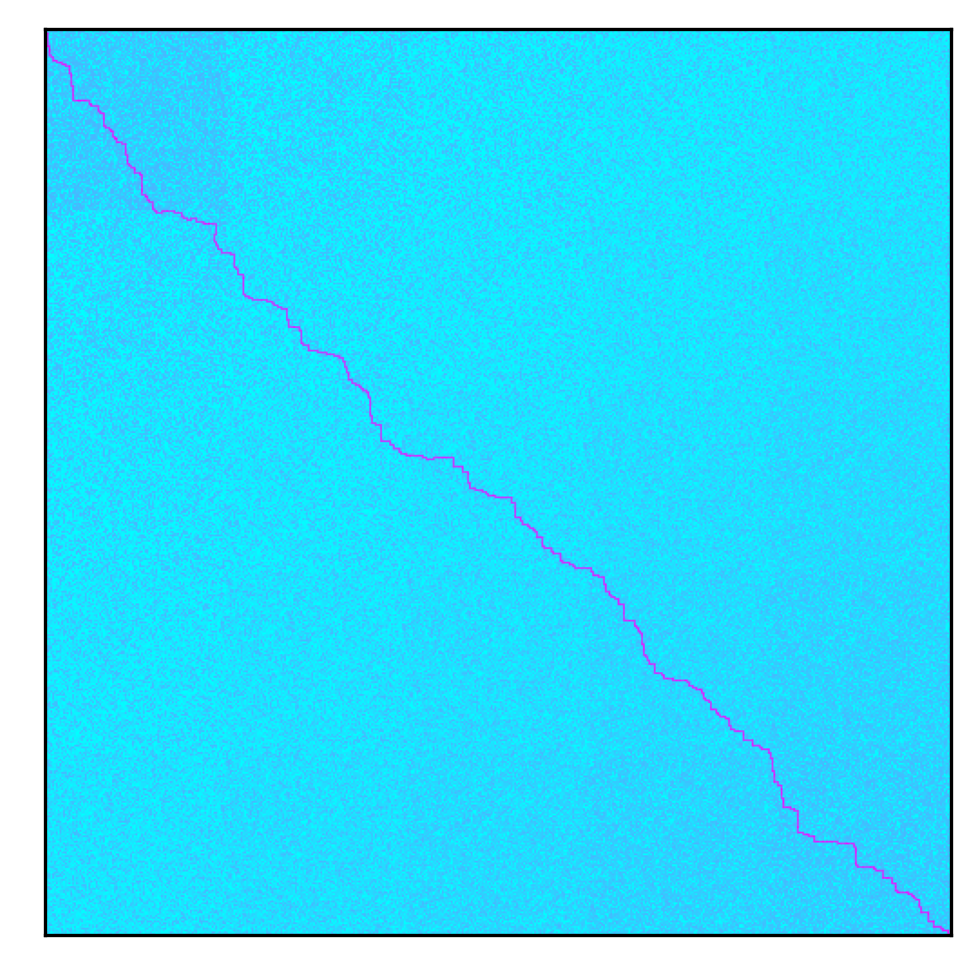

In [13]:
fig = plt.figure(figsize=(4,4),dpi=300)
f = plt.imshow(plotLarge,cmap='cool')
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)